In [180]:
# script designed to plot elevation bed and gnd profile
# BST 03MAY2020
# python

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys,os

plt.rcParams['figure.figsize'] = [20, 15]

In [181]:
in_dir = "/zippy/MARS/orig/supl/gis/shapefiles/UAF/radar/picks/malaspina/18_19_comparison/"
os.listdir(in_dir)

['20180817-222930_pk_clip.csv',
 '18_19_comparison.png',
 '20190928-235534_pk_clip.csv']

In [182]:
file0 = in_dir + "20180817-222930_pk_clip.csv"
file1 = in_dir + "20190928-235534_pk_clip.csv"

In [183]:
# constants
c = 299792458               # Speed of light at STP
v_ice =c/np.sqrt(3.15)

In [184]:
# open data files
dat0 = np.genfromtxt(file0, delimiter=",", dtype = None, names = True)
dat1 = np.genfromtxt(file1, delimiter=",", dtype = None, names = True)

In [185]:
# linearly interp over spike from bad DEM
# dat["elev_gnd"][18305:18325] = dat["elev_gnd"][18326]


# twtt_surf = 2*(dat["elev_air"]-dat["elev_gnd"])/3e8
# thick = (dat["twtt_bed"]-twtt_surf)*c_ice/2


# elev_bed = dat["elev_gnd"] - thick

# flip one dataset 
dat1 = np.flipud(dat1)

lon0 =dat0["lon"]
lat0 = dat0["lat"]
elev_air0=dat0["elev_air"]
elev_gnd0=dat0["elev_gnd"]
elev_bed0=dat0["elev_bed"]
thick0=dat0["thick"]

lon1 =dat1["lon"]
lat1 = dat1["lat"]
elev_air1=dat1["elev_air"]
elev_gnd1=dat1["elev_gnd"]
elev_bed1=dat1["elev_bed"]
thick1=dat1["thick"]



dist0 = np.zeros(dat0.shape[0])
for _i in range(len(dist0)):
    if _i>=1:
        dist0[_i] = dist0[_i-1] + np.sqrt((lon0[_i] - lon0[_i-1])**2 + (lat0[_i] - lat0[_i-1])**2)

dist1 = np.zeros(dat1.shape[0])
for _i in range(len(dist1)):
    if _i>=1:
        dist1[_i] = dist1[_i-1] + np.sqrt((lon1[_i] - lon1[_i-1])**2 + (lat1[_i] - lat1[_i-1])**2)
        
dist0 = dist0*100     # convert to km
dist1 = dist1*100     # convert to km

# plt.rcParams.update({'font.size': 22})
# plt.plot(dist[39000:-500],dat["elev_gnd"][39000:-500])
# plt.plot(dist[39000:-500],elev_bed[39000:-500])
# plt.title('Bering Glacier Cross Flow Profile')
# plt.xlabel('Distance  along track (km)')
# plt.ylabel('Elevation above msl (m)')
# plt.show()



# plt.plot(dist[5000:23000],dat["elev_gnd"][5000:23000])
# plt.plot(dist[5000:23000],elev_bed[5000:23000])
# plt.title('Bering Glacier Along Flow Profile')
# plt.xlabel('Distance  along track (km)')
# plt.ylabel('Elevation above msl (m)')
# plt.show()

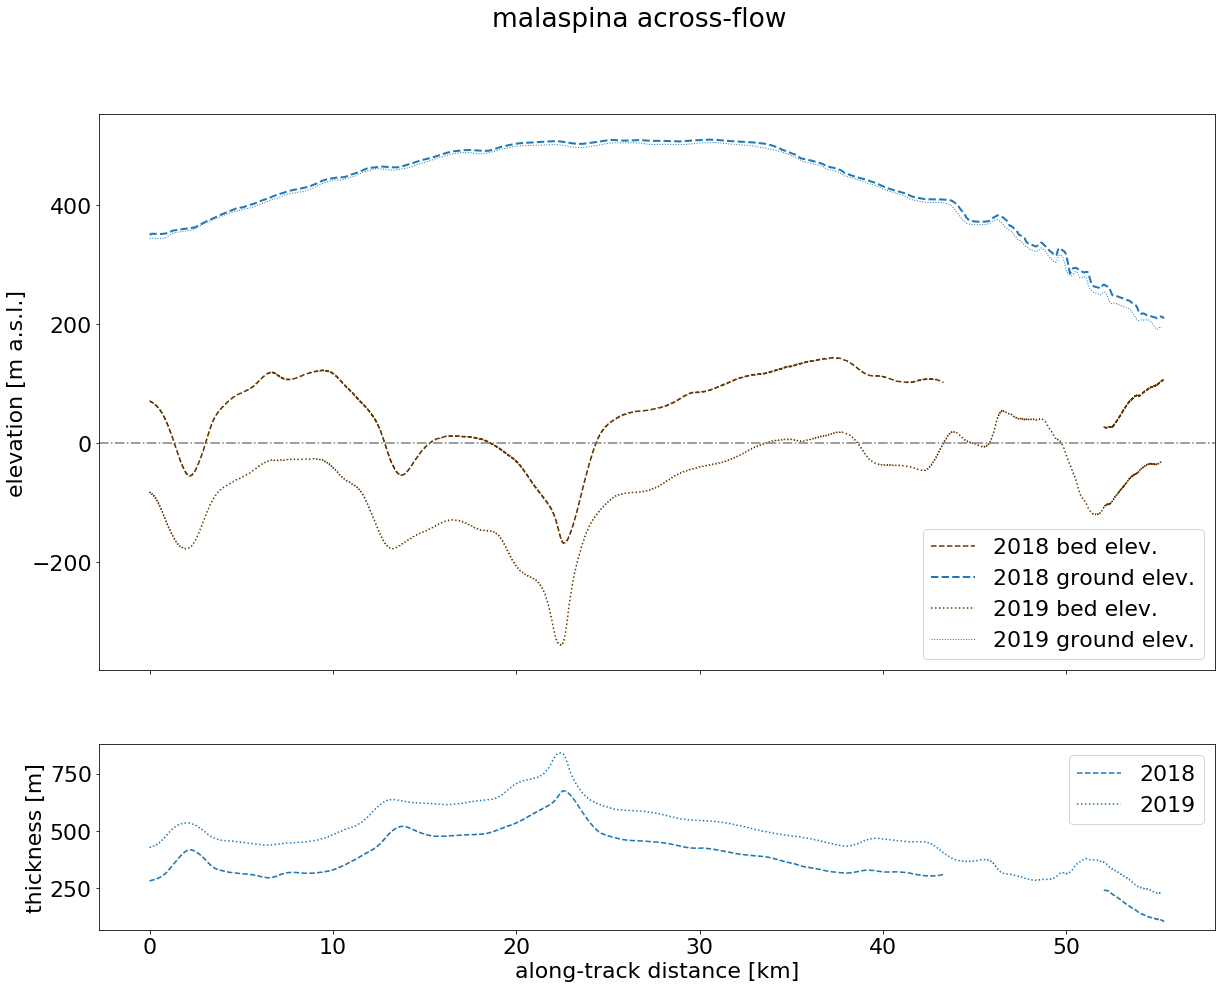

In [186]:
# plot
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [3, 1]})


ax[0].plot(dist0,elev_bed0,color="xkcd:brown",linestyle="--",label="2018 bed elev.")
ax[0].plot(dist0,elev_gnd0,color="C0",linestyle="--",linewidth=2,label="2018 ground elev.")

ax[0].plot(dist1,elev_bed1,color="xkcd:brown",linestyle=":",label="2019 bed elev.")
ax[0].plot(dist1,elev_gnd1,color="C0",linestyle=":",linewidth=1,label="2019 ground elev.")

ax[0].axhline(y=0,c="gray",linestyle="-.")

# # initiate a twin axis that shares the same x-axis and shows approximate depth
# self.secaxy1 = self.ax.twinx()
# self.secaxy1.yaxis.set_ticks_position("right")
# self.secaxy1.yaxis.set_label_position("right")

fig.suptitle("malaspina across-flow")
ax[0].legend()
ax[1].set_xlabel("along-track distance [km]")
ax[0].set_ylabel("elevation [m a.s.l.]")


ax[1].plot(dist0,thick0,color="C0",linestyle="--",label="2018")
ax[1].plot(dist1,thick1,color="C0",linestyle=":",label="2019")
ax[1].legend()
ax[1].set_ylabel("thickness [m]")

plt.show()

In [187]:
# save fig
fig.savefig(in_dir + "18_19_comparison.png")

781
[ 146.63221463  146.52004822  146.40928365 ...,  218.768891    218.82951579
  218.87185904]
630.049872892
616.006979872


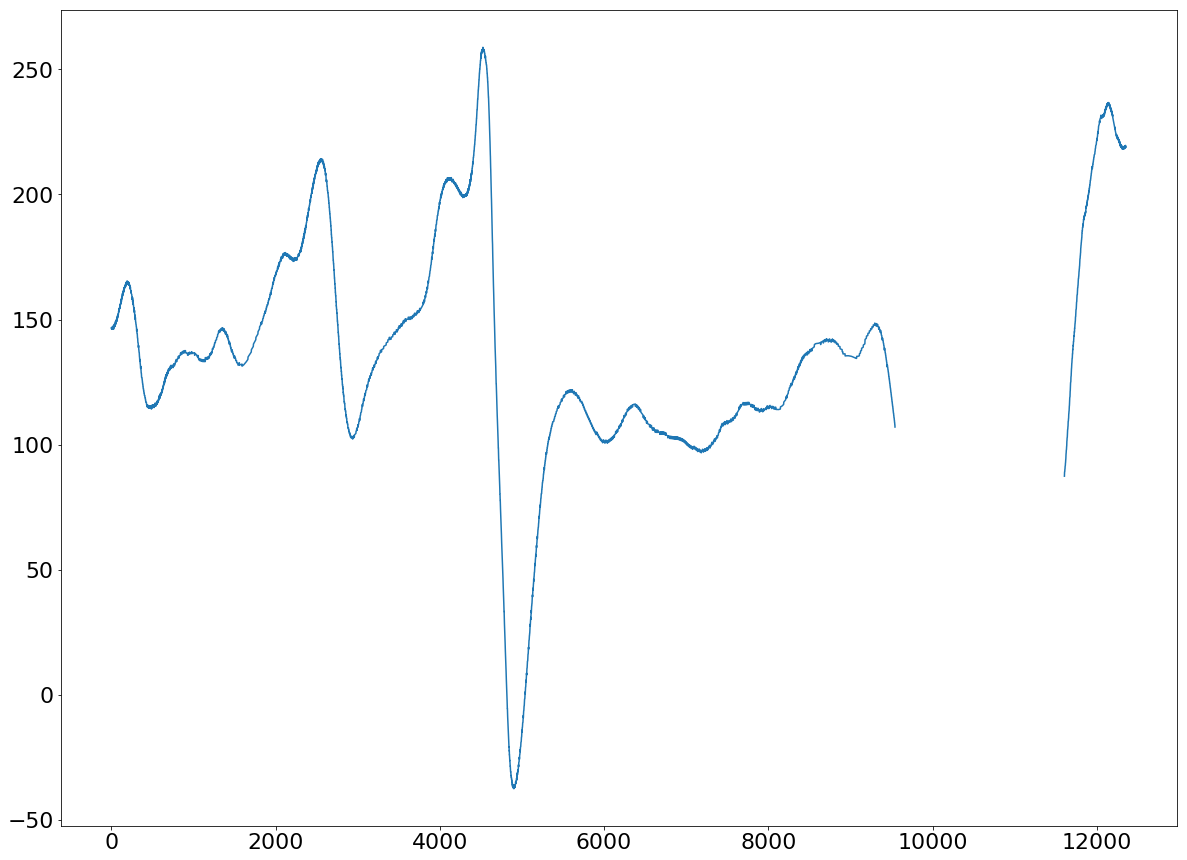

In [188]:
# what is the difference in thickness values between the two data files
# may need to clip to same size
print(len(thick1)-len(thick0))
thick1 = thick1[:thick0.shape[0]]
diff = thick1-thick0
print(diff)
plt.plot(diff)
print(thick0[5000])
print(thick1[5000])

In [189]:
# recorded ground elevation for track 20180819-215243 seems to be off be ~100 m -
# strangely this does not seemt he case for other 2018 data over Malaspina
f0="../20180819-215243_pk_mask.csv"
f1="../20180819-215243_pk_mask_arcticDEM_10m.csv"

dat0 = np.genfromtxt(f0, delimiter=",", dtype = None, names = True)
dat1 = np.genfromtxt(f1, delimiter=",", dtype = None, names = True)

lon0 =dat0["lon"]
lat0 = dat0["lat"]
elev_air0=dat0["elev_air"]
elev_gnd0=dat0["elev_gnd"]
elev_bed0=dat0["elev_bed"]
thick0=dat0["thick"]

lon1 =dat1["lon"]
lat1 = dat1["lat"]
elev_air1=dat1["elev_air"]
elev_gnd1=dat1["arcticDEM_10m"]
elev_bed1=dat1["elev_bed_aDEM"]
thick1=dat1["thick"]

dist0 = np.zeros(dat0.shape[0])
for _i in range(len(dist0)):
    if _i>=1:
        dist0[_i] = dist0[_i-1] + np.sqrt((lon0[_i] - lon0[_i-1])**2 + (lat0[_i] - lat0[_i-1])**2)

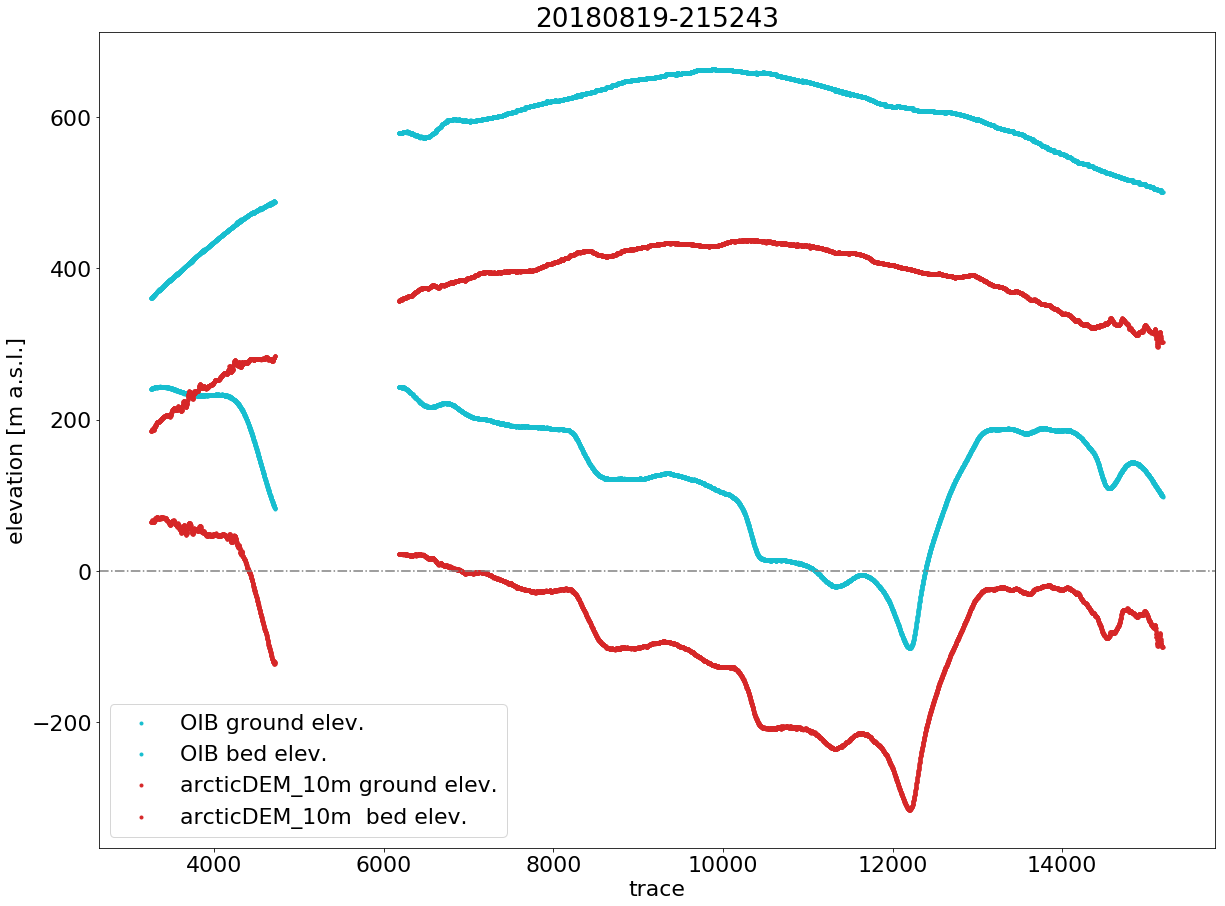

In [198]:
plt.scatter(dat0["trace"],elev_gnd0,color="C9",marker=".",label="OIB ground elev.")
plt.scatter(dat0["trace"],elev_bed0,color="C9",marker=".",label="OIB bed elev.")

plt.scatter(dat1["trace"],elev_gnd1,color="C3",marker='.',label="arcticDEM_10m ground elev.")
plt.scatter(dat1["trace"],elev_bed1,color="C3",marker=".",label="arcticDEM_10m  bed elev.")

plt.axhline(y=0,c="gray",linestyle="-.")
plt.title("20180819-215243")
plt.xlabel("trace")
plt.ylabel("elevation [m a.s.l.]")
plt.legend()
plt.show()

In [199]:
# save fig
fig.savefig(in_dir + "../20180819-215243_OIB_aDEM_elev_diff.png")

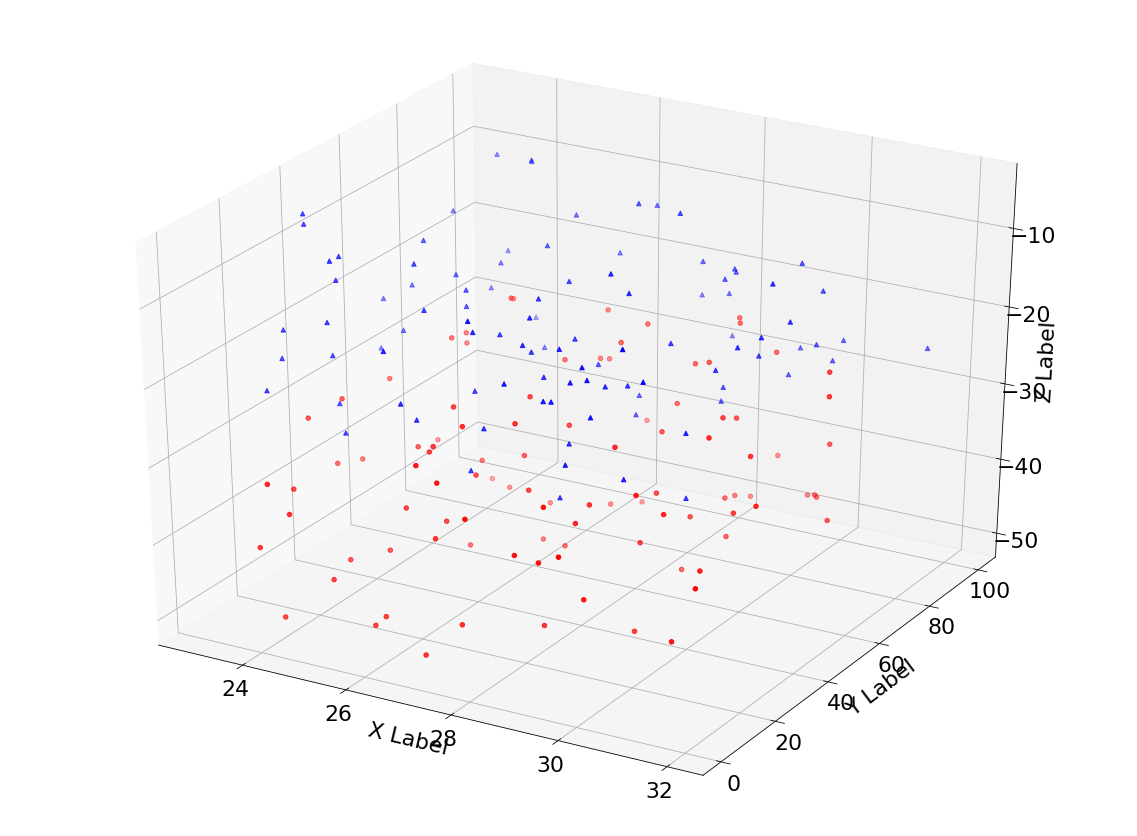

In [123]:
# 3D "fencepost" diagram of elevations
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

lat=

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [207]:
f0="/zippy/MARS/targ/supl/UAF/2015/picks/2015_may14_15_pk.csv"

dat0 = np.genfromtxt(f0, delimiter=",", dtype = None, names = True)

lon0 =dat0["lon"]
lat0 = dat0["lat"]
elev_air0=dat0["elev_air"]
elev_gnd0=dat0["elev_gnd"]
elev_bed0=dat0["elev_bed"]
thick0=dat0["thick"]

dist0 = np.zeros(dat0.shape[0])
for _i in range(len(dist0)):
    if _i>=1:
        dist0[_i] = dist0[_i-1] + np.sqrt((lon0[_i] - lon0[_i-1])**2 + (lat0[_i] - lat0[_i-1])**2)

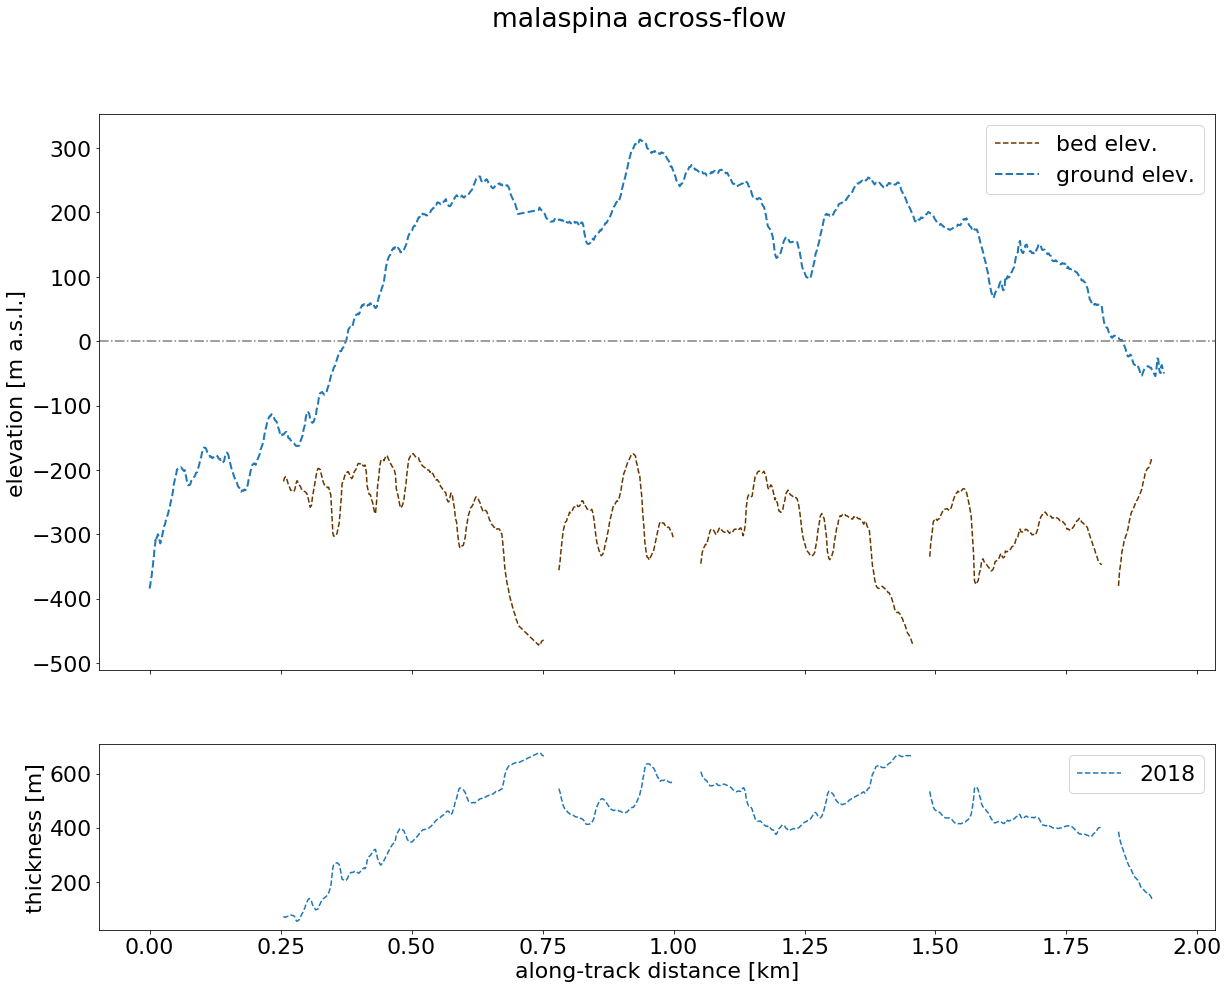

In [208]:
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [3, 1]})


ax[0].plot(dist0,elev_bed0,color="xkcd:brown",linestyle="--",label="bed elev.")
ax[0].plot(dist0,elev_gnd0,color="C0",linestyle="--",linewidth=2,label="ground elev.")

ax[0].axhline(y=0,c="gray",linestyle="-.")

# # initiate a twin axis that shares the same x-axis and shows approximate depth
# self.secaxy1 = self.ax.twinx()
# self.secaxy1.yaxis.set_ticks_position("right")
# self.secaxy1.yaxis.set_label_position("right")

fig.suptitle("malaspina across-flow")
ax[0].legend()
ax[1].set_xlabel("along-track distance [km]")
ax[0].set_ylabel("elevation [m a.s.l.]")


ax[1].plot(dist0,thick0,color="C0",linestyle="--",label="2018")
ax[1].legend()
ax[1].set_ylabel("thickness [m]")

plt.show()